Most of the code is taken from "Face Recognition on Olivetti Dataset", Kaggle (https://www.kaggle.com/serkanpeldek/face-recognition-on-olivetti-dataset) 

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1. There are ten different image of each of 40 distinct people

2. There are 400 face images in the dataset

3. Face images were taken at different times, variying ligthing, facial express and facial detail

4. Size of each image is 64x64

5. Image pixel values were scaled to [0, 1] interval

6. Names of 40 people were encoded to an integer from 0 to 39

In [3]:
data = np.load("C:/Users/User/Desktop/cs131/Object recognition/Kaggel/olivetti_faces.npy")
target = np.load("C:/Users/User/Desktop/cs131/Object recognition/Kaggel/olivetti_faces_target.npy")

In [10]:
data.shape, target.shape

((400, 64, 64), (400,))

In [6]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64


In [11]:
print("unique target number: ", np.unique(target))

unique target number:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


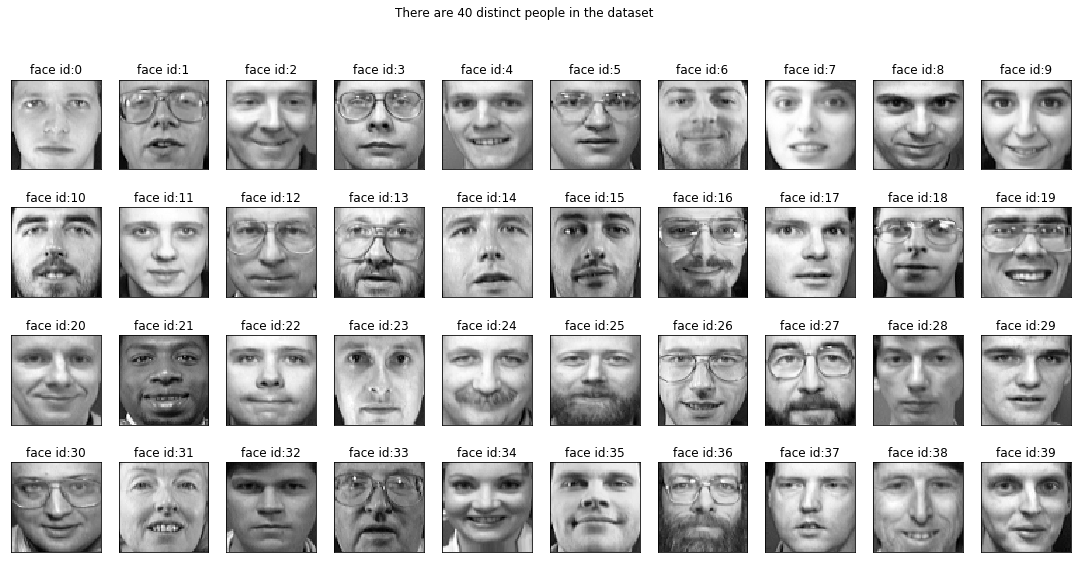

In [18]:
def show_all_distinct_people(images, unique_ids):
    # creating 4*10 subplots in 18*9 figure size
    fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(19, 9))
    #print(axarr)
    
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    # iterating over user ids 
    for unique_id in unique_ids:
        image_index = unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")     
    
    

show_all_distinct_people(data, np.unique(target))

    

Show 10 face Images of selected target

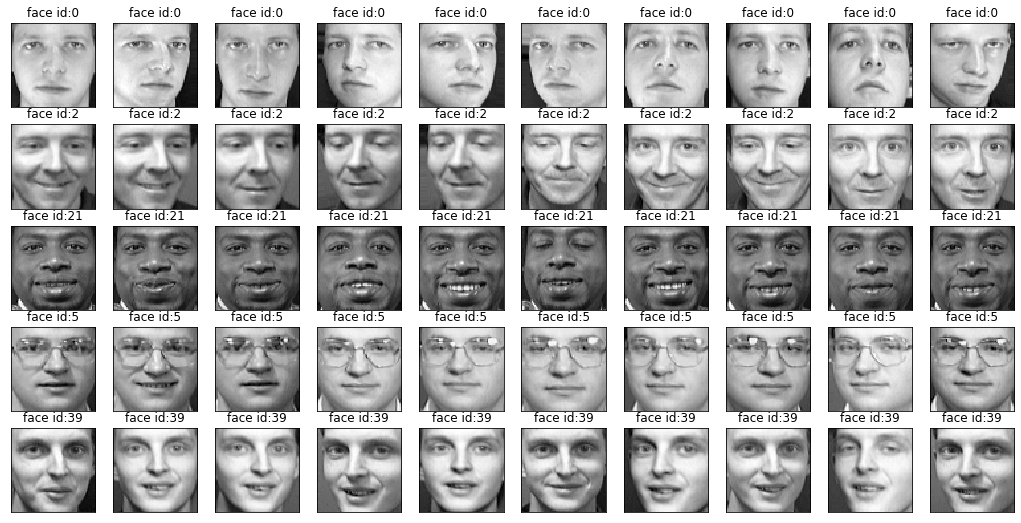

In [25]:
def show_m_faces_of_n_subject(m, images, subject_ids):
    cols=m  # m distinct faces of the same person
    rows = len(subject_ids)
    rows = int(rows)
    
    fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 9))
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*m + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

show_m_faces_of_n_subject(10, images=data, subject_ids=[0, 2, 21, 5, 39])            

Machine Learning Model for Face recognition

Machine learning models can work on vectors. Since the image data is in the matrix form, it must be converted to a vector.

In [26]:
x = data.reshape(data.shape[0], data.shape[1]*data.shape[2])
print("x shape:", x.shape)

x shape: (400, 4096)


Split data and target into random tarining subsets

In [29]:
x_train, x_test, y_train, y_test=train_test_split(x,target, test_size=0.3, stratify=target, random_state=0)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (280, 4096)
y_train shape: (280,)


PCA projection of the training data

In [34]:
pca = PCA(n_components=3)
pca.fit(x)
x_pca=pca.transform(x)

In [35]:
x_pca.shape

(400, 3)

Figure with 3 principle components

In [49]:
number_of_people=10
index_range=number_of_people*10

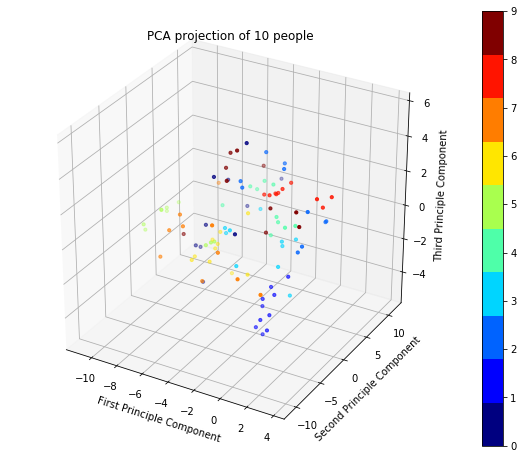

In [47]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(projection='3d')
#ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(x_pca[:index_range,0],
              x_pca[:index_range,1],
              x_pca[:index_range,2],     
              c=target[:index_range],
              s=10,
             cmap=plt.get_cmap('jet', number_of_people))

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_zlabel("Third Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

Figure with 2 principle components

In [116]:
def show_trans_plot(x_trans, index_range, comp):
    plt.scatter(x_trans[:index_range,comp[0]], 
    x_trans[:index_range,comp[1]],
    c=target[:index_range], 
    s=10,
    cmap=plt.cm.get_cmap('jet', number_of_people))
    plt.xlabel('First Component')
    plt.ylabel('Second Component')
    #plt.title("PCA projection of {} people".format(number_of_people))
    plt.colorbar();

Finding Optimal number of Principle component 

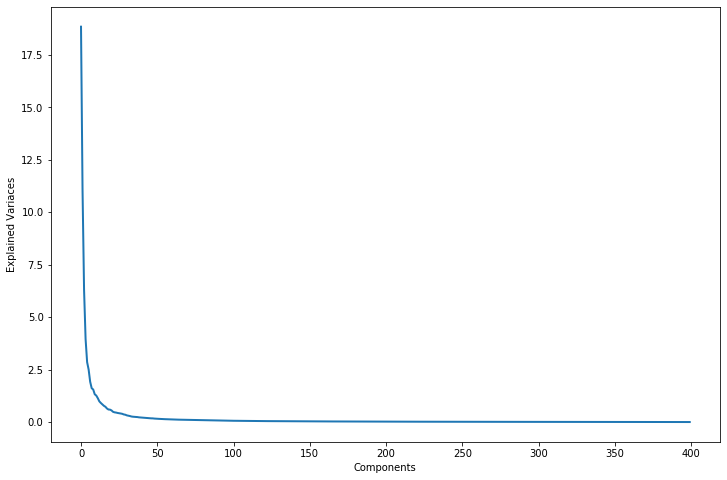

In [48]:
pca=PCA()
pca.fit(x)

plt.figure(1, figsize=(12, 8))

plt.plot(pca.explained_variance_, linewidth=2)

plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

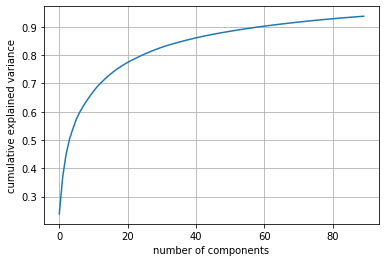

In [60]:
pca = PCA(n_components=90).fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()
plt.show()


From the above figure, we can conform that 90 and more PCA components represent the same data. Uisng these compoenents we go further.

In [61]:
prin_components=90
pca=PCA(n_components=prin_components, whiten=True)
x_pca=pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=90, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

Plotting first 2 components

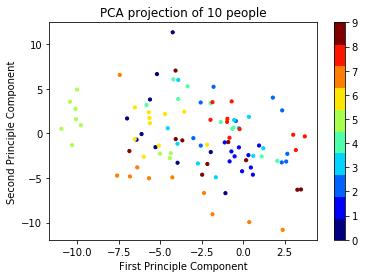

In [117]:
show_trans_plot(x_pca, index_range, [0,1])

Show Average Face

Text(0.5, 1.0, 'Average Face')

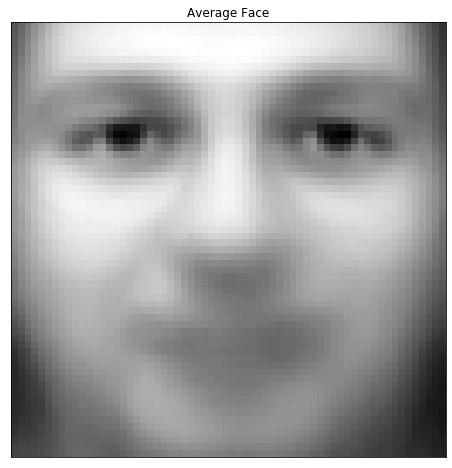

In [118]:
fig , ax = plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

All Eigen faces (Eigen vectors)

Text(0.5, 0.98, 'All Eigen Faces')

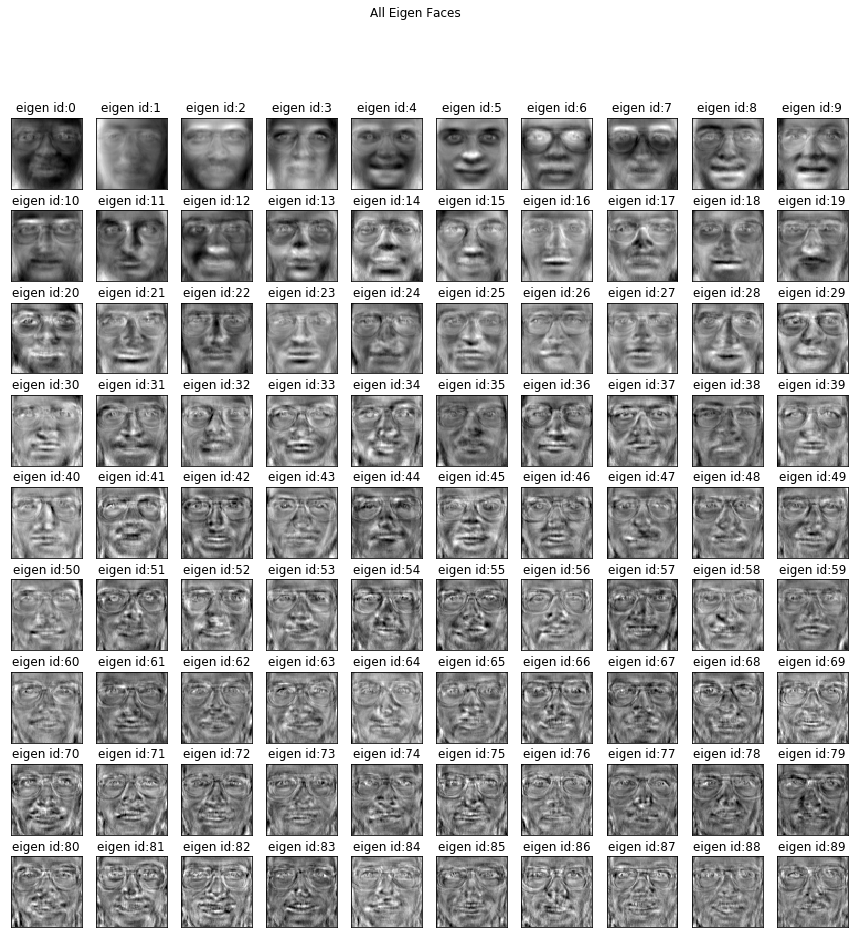

In [119]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1],
                                    data.shape[2]))
#print(eigen_faces.shape)

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i], cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=",10*"="))    
    

let's try, how we can reconstruct our original faces using subspace spanned by eigen faces according to the follwoing equation

$$ \tilde{\text{Im(k)}}=\text{reconstructed_image (k)} = \text{mean} + \sum_{i=0}^{89} a_{i} \text{eigenface}(i) $$
 
 $$ \text{where}~~ a_{i} \text {are conficients for} ~~ i=0...89 $$

In [85]:
x_project = pca.transform(x)
print(x_project.shape)
projected =pca.inverse_transform(x_project)
print(projected.shape)

(400, 90)
(400, 4096)


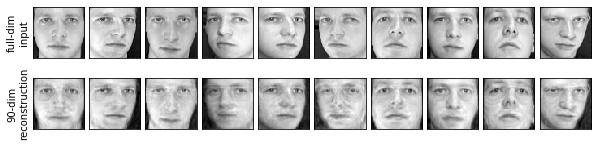

In [84]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(data[i], cmap='gray')
    ax[1, i].imshow(projected[i].reshape((64,64)), cmap='gray')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('90-dim\nreconstruction');

Classification Results

In [128]:
x_train_pca=pca.transform(x_train)
x_test_pca=pca.transform(x_test)

print(x_train_pca.shape)

(280, 90)


In [129]:
classifier = SVC()
classifier.fit(x_train_pca, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Prediction

In [94]:
y_pred=classifier.predict(x_test_pca)
print(y_pred.shape)

(120,)


In [95]:
print ("Accuracy = {} %".format(accuracy_score(y_test, y_pred)*100))

Accuracy = 91.66666666666666 %


In [97]:
y_test[:20]

array([ 4, 10, 33,  7, 37, 10, 28,  4, 27,  2,  5,  7, 28,  6, 13,  3, 35,
       26,  9, 13])

In [98]:
y_pred[:20]

array([39, 10, 33, 15, 37, 10, 28,  4, 27, 20,  5,  7, 28,  2, 13,  3, 35,
       26,  9, 13])

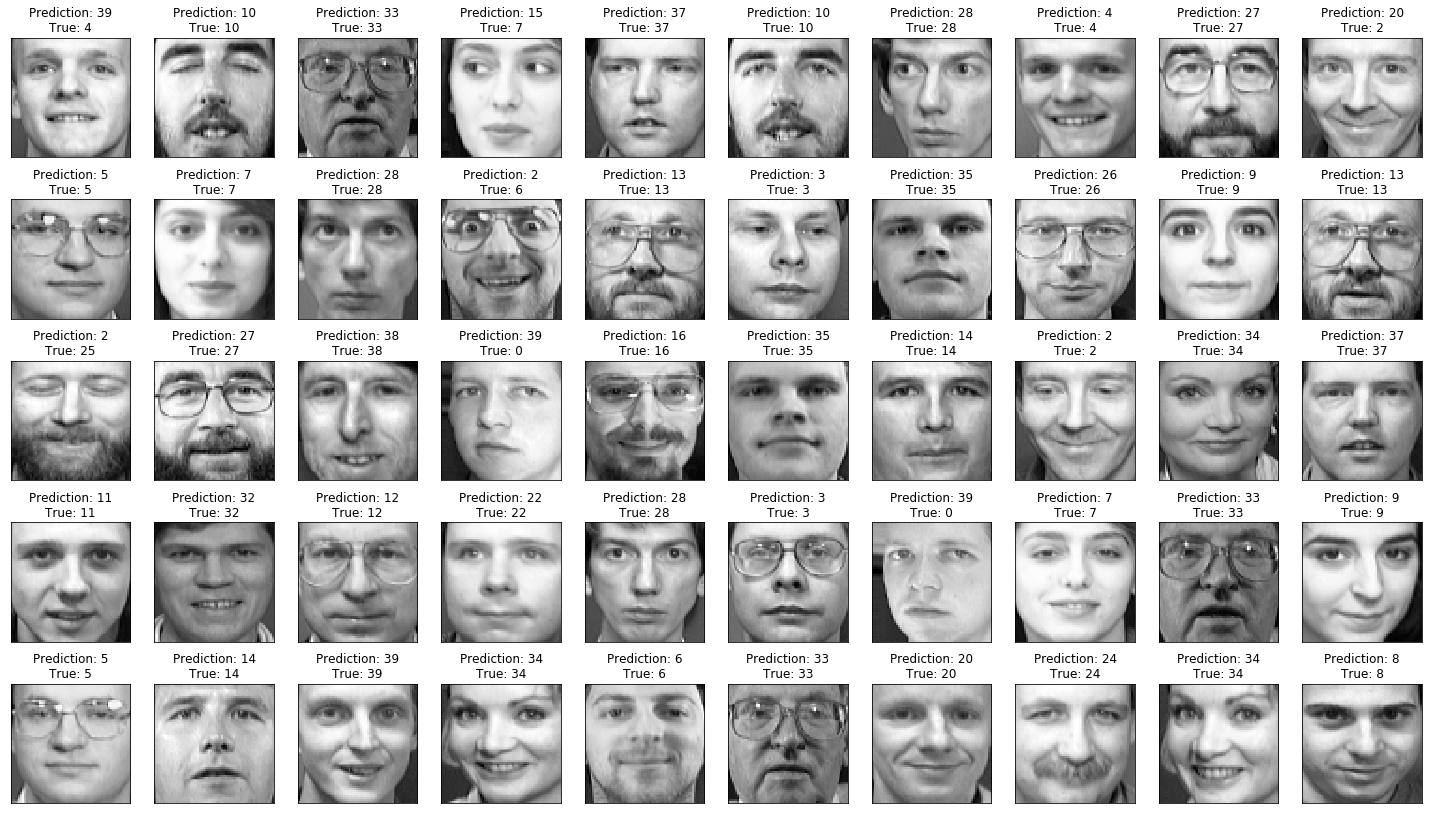

In [104]:
n_row = 5
n_col = 10

plt.figure(figsize=(2 * n_col, 2.3 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.95, hspace=.15)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(x_test[i].reshape((64, 64)), cmap="gray")
    plt.title('Prediction: %s\nTrue: %s' % (y_pred[i],
                                     y_test[i]), size=12)
    plt.xticks(())
    plt.yticks(())

plt.show()

In [105]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         3
           2       0.50      0.67      0.57         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      1.00      1.00         3
          17       1.00    

Confusing Matrix

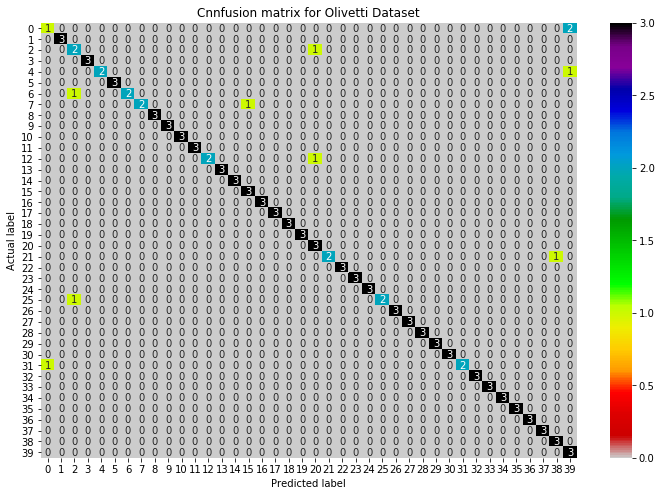

In [109]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
plt.figure(1, figsize=(12,8))
s = sns.heatmap(conf_mat, annot = True, cmap = 'nipy_spectral_r')
s.set_title('Cnnfusion matrix for Olivetti Dataset')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
None

# LDA 

In [139]:
lda = LinearDiscriminantAnalysis(n_components=39)
x_train_lda=lda.fit(x_train, y_train).transform(x_train)
x_test_lda = lda.transform(x_test)

In [120]:
lda.explained_variance_ratio_

array([0.17537373, 0.11071691, 0.08985132, 0.07386445, 0.05792916,
       0.05281665, 0.04001693, 0.03968532, 0.0322625 , 0.02988386,
       0.02923547, 0.02386246, 0.02227051, 0.01857712, 0.01814442,
       0.01703434, 0.01678794, 0.01375535, 0.01298408, 0.0117035 ,
       0.01014538, 0.00978859, 0.00975117, 0.00882355, 0.00815366,
       0.0071985 , 0.00710011, 0.00648269, 0.00589663, 0.00534057,
       0.00529336, 0.00487924, 0.00462967, 0.0040655 , 0.00366967,
       0.00347451, 0.00331016, 0.00279386, 0.00244717])

Lets plot the lda components

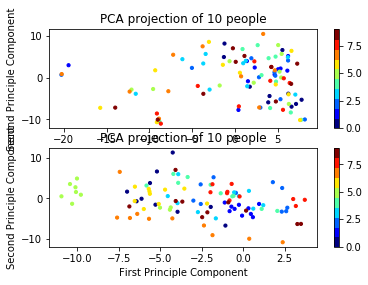

In [123]:
plt.subplot(2,1,1)
show_trans_plot(x_train_lda, index_range, [0,1])
plt.subplot(2,1,2)
show_trans_plot(x_pca, index_range, [0,1])

In [131]:
classifier_lda = SVC()
classifier_lda.fit(x_train_lda, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Predict

In [132]:
y_pred_lda=classifier_lda.predict(x_test_lda)

In [133]:
print ("Accuracy = {} %".format(accuracy_score(y_test, y_pred_lda)*100))

Accuracy = 93.33333333333333 %


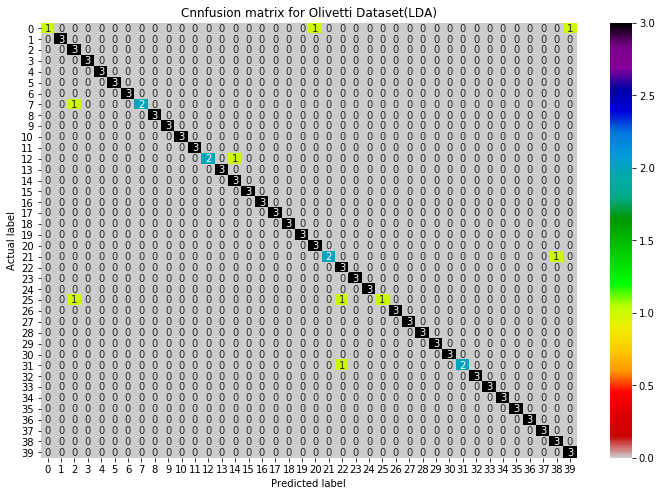

In [134]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_lda)
plt.figure(1, figsize=(12,8))
s = sns.heatmap(conf_mat, annot = True, cmap = 'nipy_spectral_r')
s.set_title('Cnnfusion matrix for Olivetti Dataset(LDA)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
None